In [31]:
import pandas as pd
import ollama
import os

# Define the function to generate image captions
def generate_caption(image_path):
    if not image_path or image_path == '[None]':
        return None
    
    try:
        with open(image_path, 'rb') as f:
            image_bytes = f.read()
        
        stream = ollama.generate(
            model='llava:v1.6',
            prompt='describe this image and make sure to include anything notable about it (include text you see in the image) and any political, social and cultural references:',
            images=[image_bytes],
            stream=True
        )
        
        response = ""
        for chunk in stream:
            response += chunk['response']
        print(f"for image path {image_path}, the response is :\n {response}")
        return response
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

# df = pd.read_json('../json files/Loksabha_t_images.json')
# df['Image_path'] = df['Image_path'].apply(lambda x: os.path.abspath(x[0]) if x and x[0] else None)

# Apply the function to each row and create a new column 'Image_caption'
df['Image_caption'] = df['Image_path'].apply(lambda x: generate_caption(x) if x else None)

# Save the updated DataFrame to a new CSV file
output_path = os.path.abspath('output_with_captions.csv')
df.to_csv(output_path, index=False)

print(df.head())  # Display the first few rows of the DataFrame
print(f"Output saved to {output_path}")


for image path d:\instagramproject\images\image_0_0.jpg, the response is :
  The image appears to be a promotional movie poster. It features the main cast of the film, which includes individuals who seem to be in formal attire—one person dressed as a lawyer and another in what could be traditional Indian attire. In the background, there are smaller figures that might represent other characters or elements from the storyline. The overall color scheme is dark with accents of red and white.

At the top, the text "TARAN ADARSH FILM REVIEW" suggests that this poster may be promoting a review or analysis of the film by Taran Adarsh, a known film critic in India. Below the main title, which is not clearly visible, there are smaller texts that could indicate the names of the actors and the film's release date.

The poster has a political or social message that says "India's Biggest Problem," suggesting that the film might address a significant issue facing Indian society. This statement implie

KeyboardInterrupt: 

Processing image: ../images/image_2_0.jpg
 The image is a photograph taken at what appears to be an event or gathering held in a location that resembles a temple complex, indicated by the architectural features such as domed roofs and arched passageways. There are several individuals present in the photo:

1. A person standing on a stage or platform, facing the camera, with a microphone stand beside them. They appear to be speaking at the event.
2. Three individuals standing on the ground level, in front of the stage. The individual closest to the camera is a woman dressed in traditional Indian attire, wearing a pink saree with white borders, and she is looking towards the person on the stage. Flanking her are two men; one is wearing a suit and tie, while the other is dressed casually.
3. Two individuals are seated to the right of the frame; they appear to be engaged in conversation, and their backs are turned towards the camera, making it difficult to identify them clearly.
4. The bac

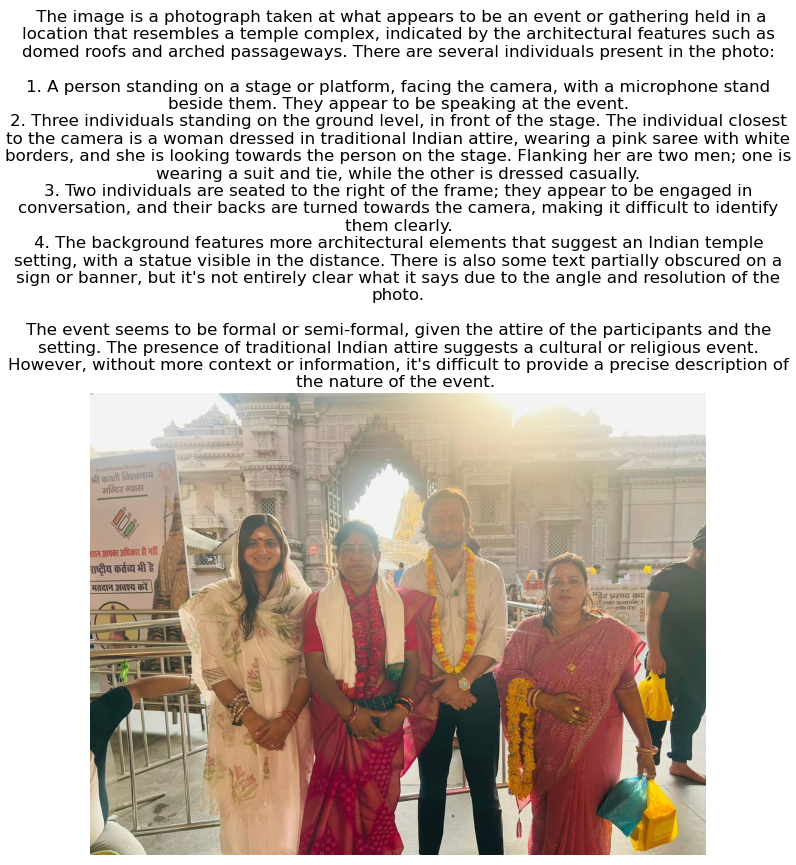

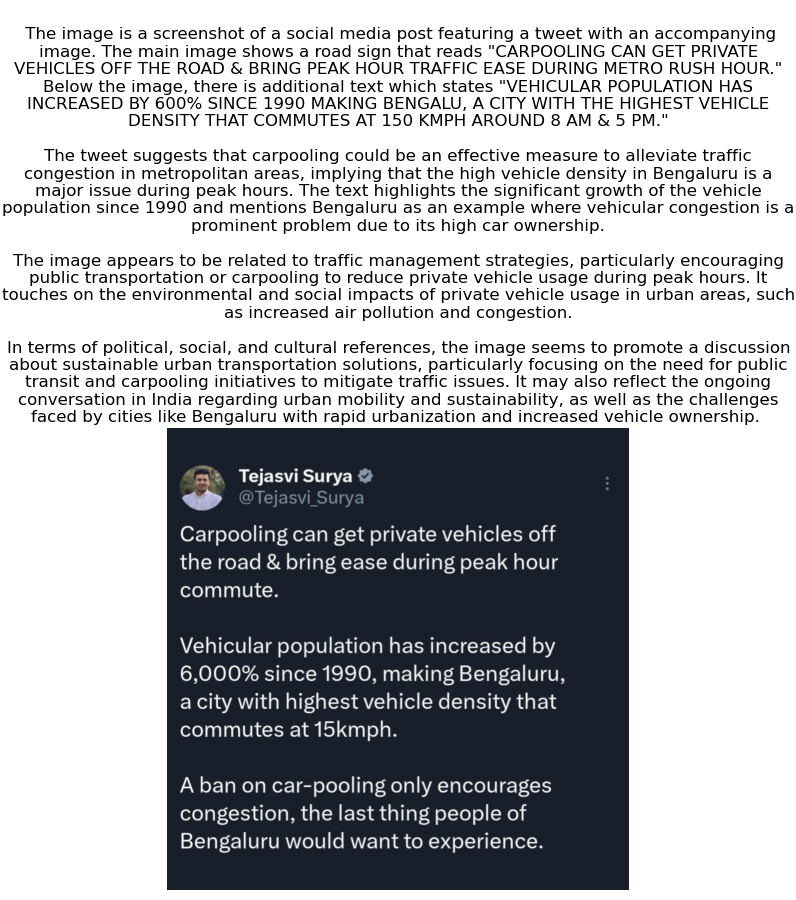

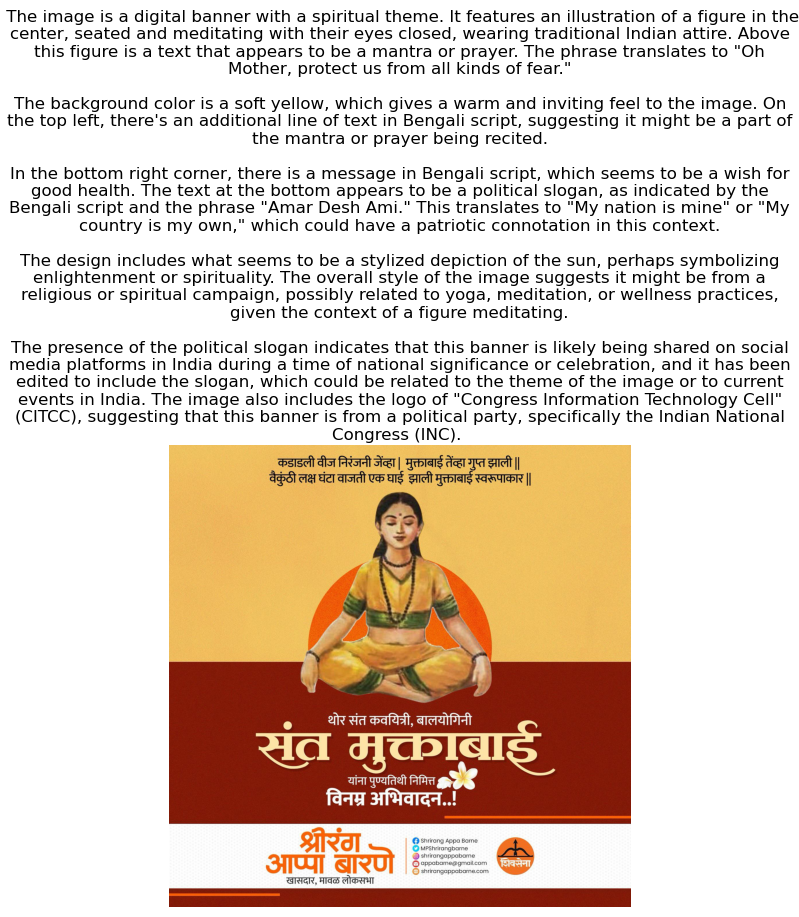

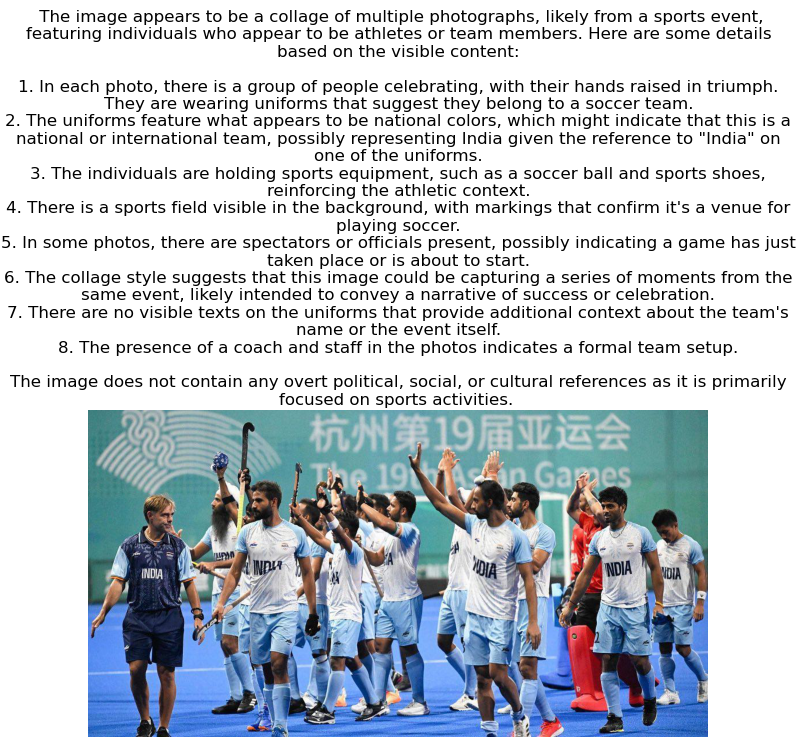

d:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2309 (\N{DEVANAGARI LETTER A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2343 (\N{DEVANAGARI LETTER DHA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2367 (\N{DEVANAGARI VOWEL SIGN I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2360 (\N{DEV

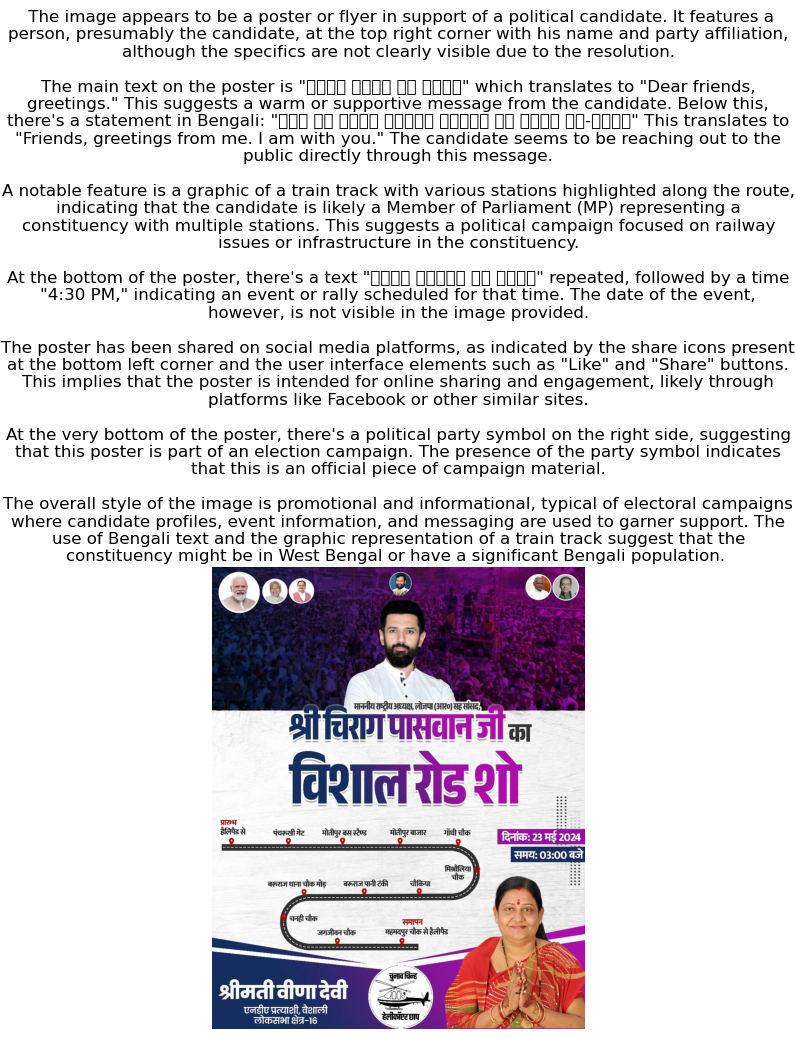

In [32]:
import ollama
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the function to generate image captions
def generate(model, image_path, prompt):
    # Open and read the image file as bytes
    with open(image_path, 'rb') as f:
        image_bytes = f.read()
    
    # Stream the generation from the ollama model
    stream = ollama.generate(
        model=model,
        prompt=prompt,
        images=[image_bytes],
        stream=True
    )
    
    response = ""
    for chunk in stream:
        response += chunk['response']
    
    return response

# Example usage
image_files = ['../images/image_2_0.jpg','../images/image_15312_0.jpg', '../images/image_24_0.jpg', '../images/image_15012_0.jpg', '../images/image_308_0.jpg']  # Replace with actual image paths
captions = []

# Generate captions for each image
for image_file in image_files:
    print(f"Processing image: {image_file}")
    caption = generate(
        model='llava:v1.6',
        image_path=image_file,
        prompt='describe this image and make sure to include anything notable about it (include text you see in the image) and any political, social and cultural references:'
    )
    captions.append(caption)
    print(caption)

# Plot each image with its corresponding caption
for image_file, caption in zip(image_files, captions):
    img = mpimg.imread(image_file)
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.title(caption, wrap=True)  # wrap=True ensures that long text is wrapped
    plt.axis('off')  # Turn off axis
    plt.show()


In [34]:
gpt_captions = ['''To provide a description of the uploaded image, I will analyze the visual and textual elements in it:

Description of the Image
People in the Image:

The image features four individuals standing in front of a temple entrance. They appear to be posing for a photograph.
The first individual on the left is a woman dressed in a white and floral-patterned saree with a light scarf covering her head.
The second individual is a woman dressed in a red saree with a white scarf and floral garlands around her neck.
The third individual is a man dressed in a white shirt with floral garlands around his neck.
The fourth individual is a woman dressed in a pink saree, also wearing floral garlands and holding yellow bags.
Temple Background:

The background shows the entrance of a temple with intricate carvings and architectural details.
There is a bright light source, possibly the sun, shining through the entrance, creating a radiant effect.
Text in the Image:

There is a signboard on the left side of the image with text in Hindi.
The text on the signboard reads:
Copy code
श्री काशी विश्वनाथ मंदिर न्यास
मतदान आपका अधिकार ही नहीं
राष्ट्रीय कर्तव्य भी है
मतदान अवश्य करें
This translates to "Shri Kashi Vishwanath Temple Trust" and "Voting is not only your right but also a national duty. Please vote."
Cultural and Social References
Cultural Significance:

The attire of the individuals (sarees and traditional garlands) and the location (temple) indicate that this could be a religious or cultural visit. The temple architecture suggests it might be a significant Hindu temple.
The signboard mentions "Shri Kashi Vishwanath Temple," which is a famous Hindu temple dedicated to Lord Shiva in Varanasi, India. It is one of the most revered temples in Hinduism.
Social and Political Context:

The mention of voting on the signboard highlights the importance of civic duty and participation in elections. It encourages people to vote, emphasizing it as both a right and a national duty.
Religious Context:

The individuals' visit to the temple and their traditional attire suggest a spiritual or religious purpose. The garlands they are wearing are typically used in Hindu rituals and ceremonies.
Notable Elements
Text and Message:
The text on the signboard emphasizes the importance of voting, linking it to national duty and responsibility.
Visual Elements:
The bright light from the temple entrance adds a divine or auspicious feel to the image, enhancing the spiritual atmosphere.
This image captures a moment of cultural and religious significance, with a social message about the importance of voting. The traditional attire and temple background highlight the rich cultural heritage of India.''', '''he image is a screenshot of a tweet by Tejasvi Surya, an Indian politician known for his role in the Bharatiya Janata Party (BJP). The tweet reads:

"Carpooling can get private vehicles off the road & bring ease during peak hour commute.

Vehicular population has increased by 6,000% since 1990, making Bengaluru, a city with highest vehicle density that commutes at 15kmph.

A ban on car-pooling only encourages congestion, the last thing people of Bengaluru would want to experience."

Notable points about the tweet:

Carpooling Advocacy: Tejasvi Surya advocates for carpooling, emphasizing its potential to reduce the number of private vehicles on the road and ease traffic congestion during peak hours.
Statistics on Vehicular Population: He mentions a significant increase in the vehicular population in Bengaluru, citing a 6,000% increase since 1990, leading to a high vehicle density in the city.
Traffic Speed: The tweet points out that due to high vehicle density, the average commuting speed in Bengaluru is 15 kilometers per hour.
Opposition to Carpooling Ban: Surya criticizes any potential ban on carpooling, arguing that it would worsen congestion, which is undesirable for the residents of Bengaluru.
Cultural and Social Context:

Bengaluru's Traffic Issues: Bengaluru, also known as Bangalore, is notorious for its severe traffic congestion, which affects daily commuting and the overall quality of life for its residents.
Political Stance: Tejasvi Surya, as a BJP politician, is addressing a local issue that has significant implications for urban planning and transportation policy in Bengaluru.
Urban Development: The tweet reflects ongoing debates about sustainable urban development and the need for effective transportation solutions in rapidly growing cities like Bengaluru.''', '''The image is a tribute poster for Sant Muktabai, featuring her illustration in a meditative pose. The text in the image is in Marathi and includes a poetic verse along with a message of reverence. Here's a detailed description and analysis of the image:

Text in the Image
Top Verse (in Marathi):

Copy code
कडाडली वीज निरंजनी झेंला | मुक्ताबाई तेव्हा गुप्त झाली ||
वैकुंठी लक्ष घंटा वाजती एक घाई | झाली मुक्ताबाई स्वरूपाकार ||
This verse praises Sant Muktabai, highlighting her spiritual journey and divine transformation.

Main Title (in Marathi):

Copy code
थोर संत कवयित्री, बालयोगिनी
संत मुक्ताबाई
यांना पुण्यतिथी निमित्त
विनम्र अभिवादन..!
Translation: "Great saint poetess, child yogini Sant Muktabai. Respectful tribute on the occasion of her death anniversary."

Bottom Section:

Name and Title:
Copy code
श्रीरंग आप्पा बारणे
खासदार, मावळ लोकसभा
Translation: "Shrirang Appa Barne, Member of Parliament, Maval Lok Sabha"
Social Media and Contact Information:
Twitter: @MPShrirangBarne
Facebook: @shrirangappabarne
Instagram: @appabarne
Email: appabarne@gmail.com
Website: shrirangappabarne.com
Party Logo: Symbol of Shivsena, a regional political party in Maharashtra, India.
Notable Aspects
Cultural Significance:

Sant Muktabai: She was a revered saint and poetess from Maharashtra, part of the Bhakti movement. Her contributions to Marathi literature and spirituality are significant, and she is respected for her deep philosophical insights.
Tribute and Respect: The poster commemorates her death anniversary, showcasing the cultural practice of honoring saints and spiritual figures in India.
Political Connection:

Shrirang Appa Barne: The poster is issued by Shrirang Appa Barne, a Member of Parliament from the Maval constituency, indicating his participation in cultural and religious observances, which is common among Indian politicians to connect with their constituents.
Shivsena Party: The presence of the Shivsena logo signifies the political affiliation of Shrirang Appa Barne, indicating the party's involvement in promoting regional culture and heritage.
Visual Elements
Illustration: The image of Sant Muktabai shows her in a serene, meditative pose, dressed in traditional attire, which reflects her spiritual demeanor.
Color Scheme: The use of warm colors (yellow, orange, and brown) creates a respectful and reverent atmosphere suitable for a tribute.
In summary, the image serves as a respectful homage to Sant Muktabai on her death anniversary, issued by a regional politician to emphasize cultural heritage and religious observance, while also subtly highlighting his political identity and party affiliation.''', '''The image features the Indian men's field hockey team celebrating after a match. The players are wearing white and light blue jerseys with "INDIA" printed on the front. They are raising their sticks and waving, likely acknowledging the crowd or celebrating a victory.

Notable Elements:
Players and Attire:

The players are dressed in their official team uniforms, which consist of white and light blue jerseys and shorts. The word "INDIA" is prominently displayed on their shirts.
One player, identifiable by his beard, is holding a flower garland, suggesting a celebratory or victory moment.
The coach, wearing a different set of sportswear, stands on the left side of the image.
Setting:

The backdrop indicates that this is taking place during the 19th Asian Games, held in Hangzhou. The text in the background confirms the event: "The 19th Asian Games."
Cultural and Social Context:

Asian Games: This is a major multi-sport event held every four years among athletes from all over Asia. Performing well in such an event is a significant achievement for any nation.
Field Hockey in India: Field hockey is a historically important sport in India, with the country having a rich legacy and numerous accolades in the sport. The image captures a moment of pride and accomplishment for the Indian team.
Celebration:

The image captures a moment of camaraderie and celebration among the team members, highlighting their teamwork and collective effort.
The gesture of raising sticks and waving to the crowd is a common way for athletes to show appreciation and connect with their supporters.
This image encapsulates a moment of triumph for the Indian field hockey team, reflecting their hard work and the significance of the Asian Games in the sporting community.''', "ran out of gpt tokens"]

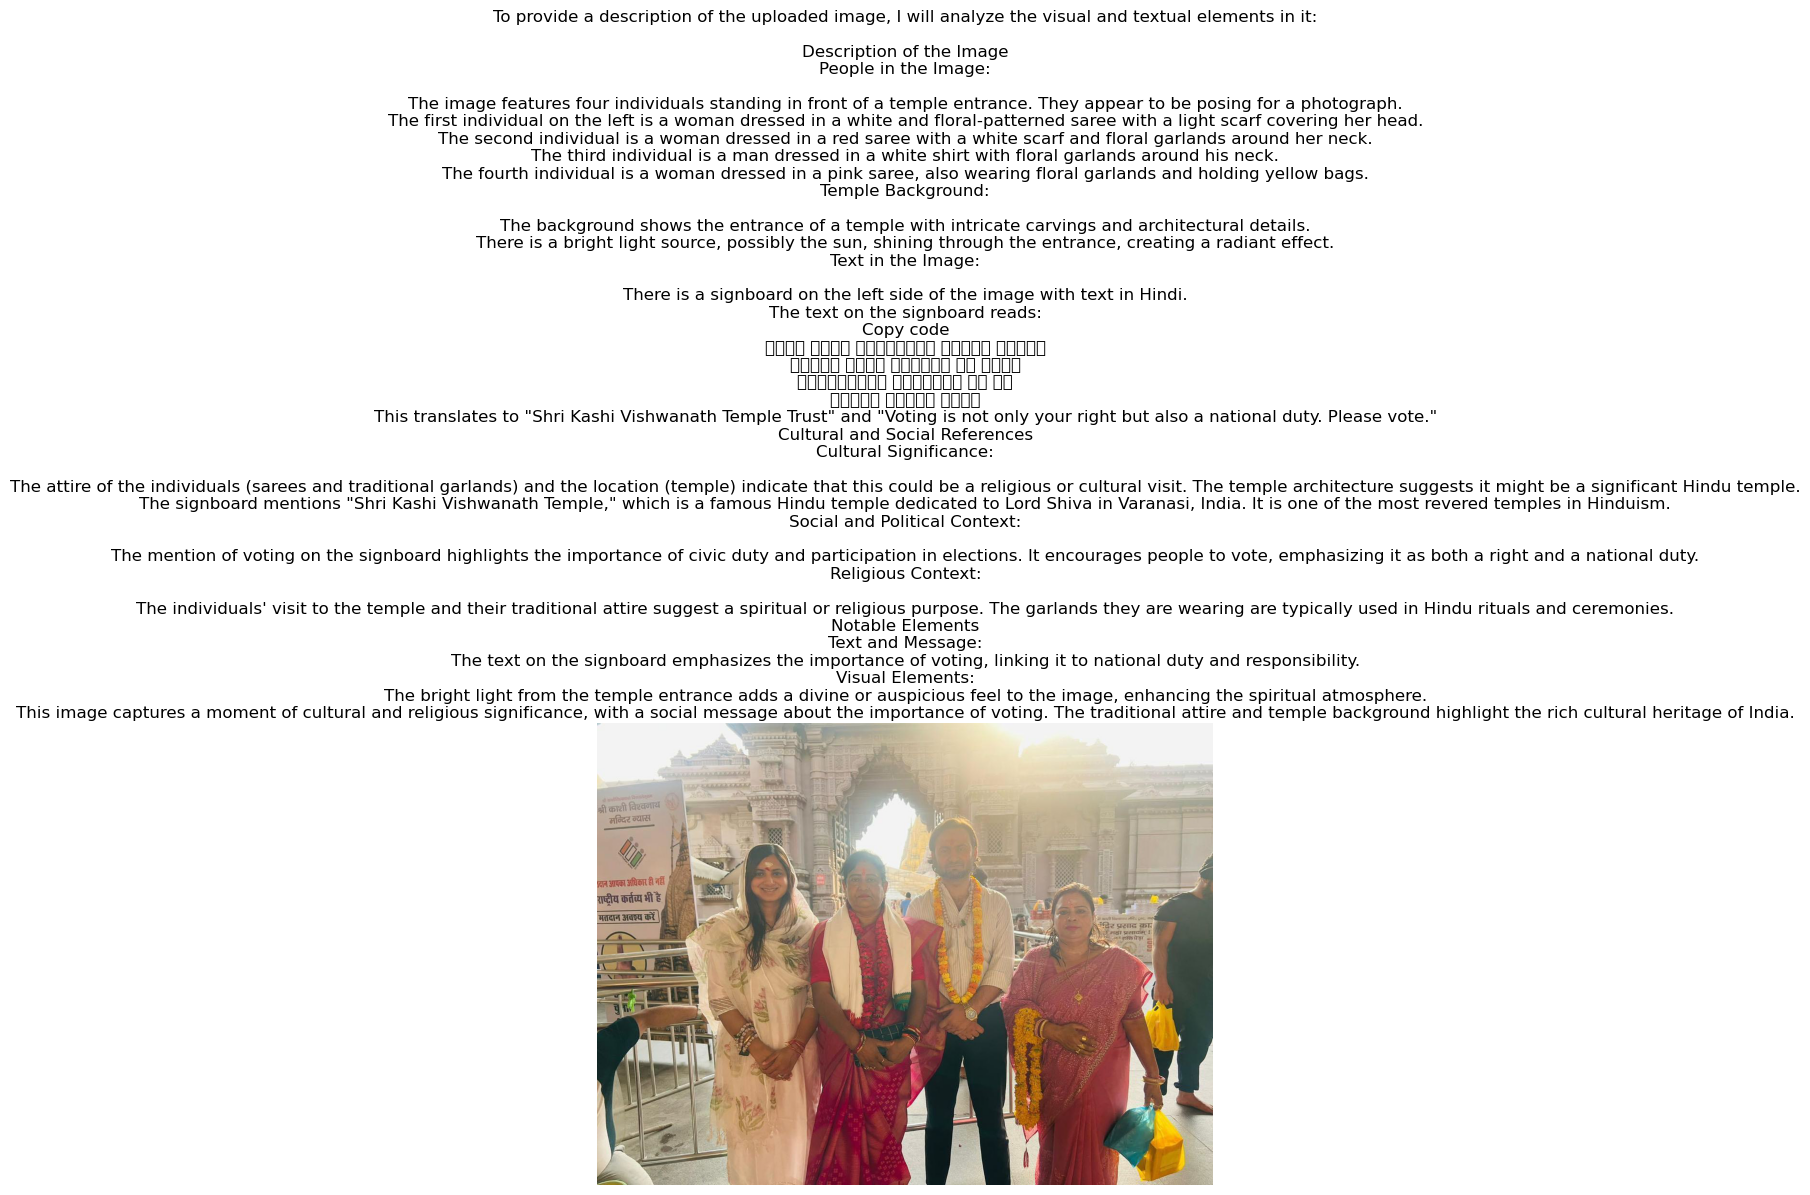

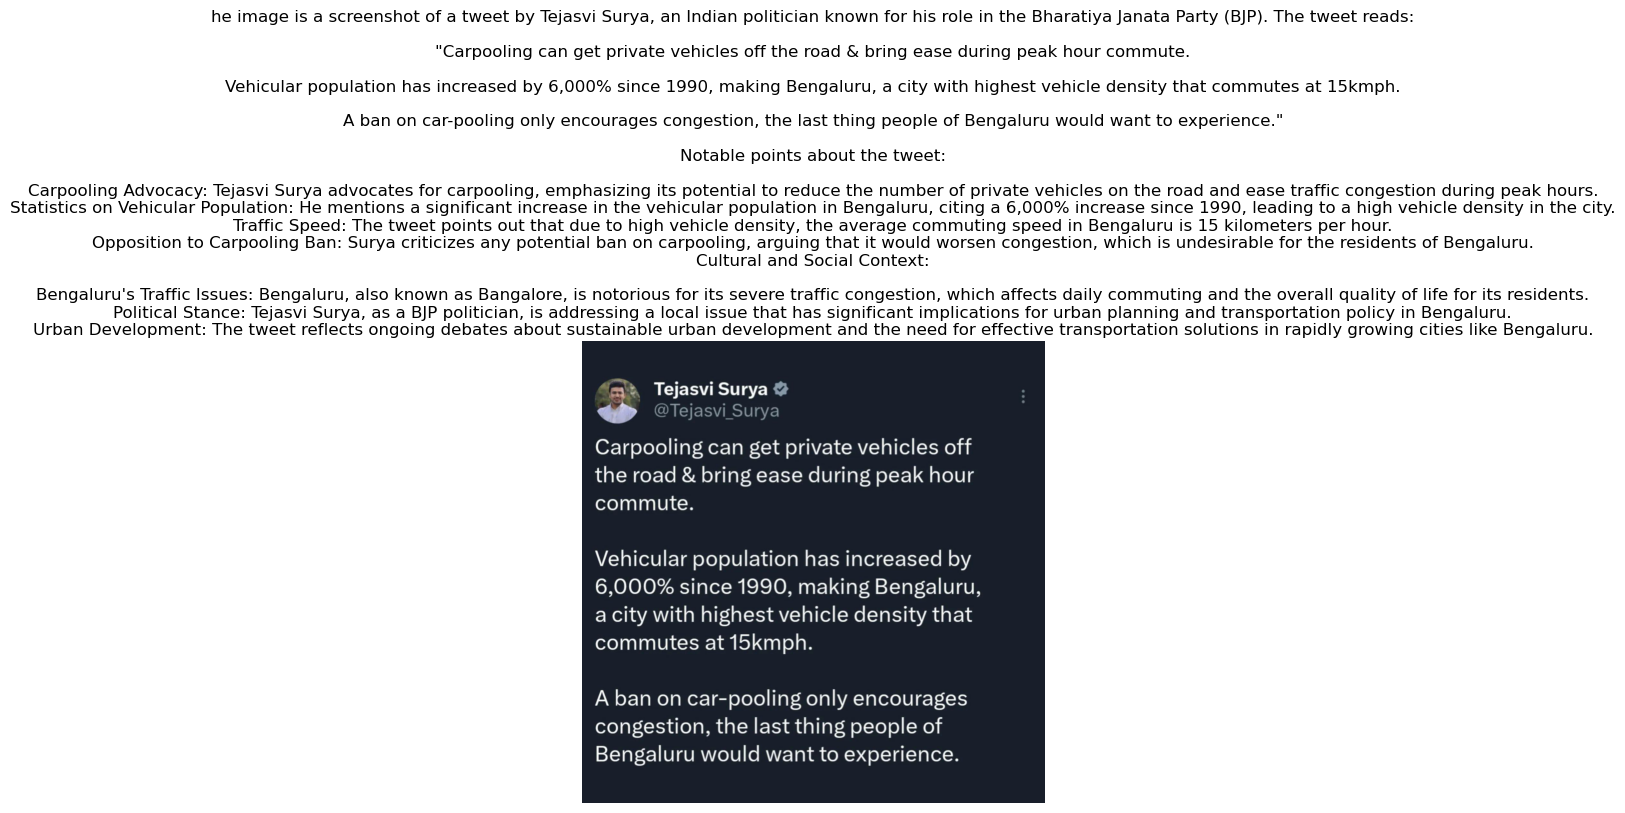

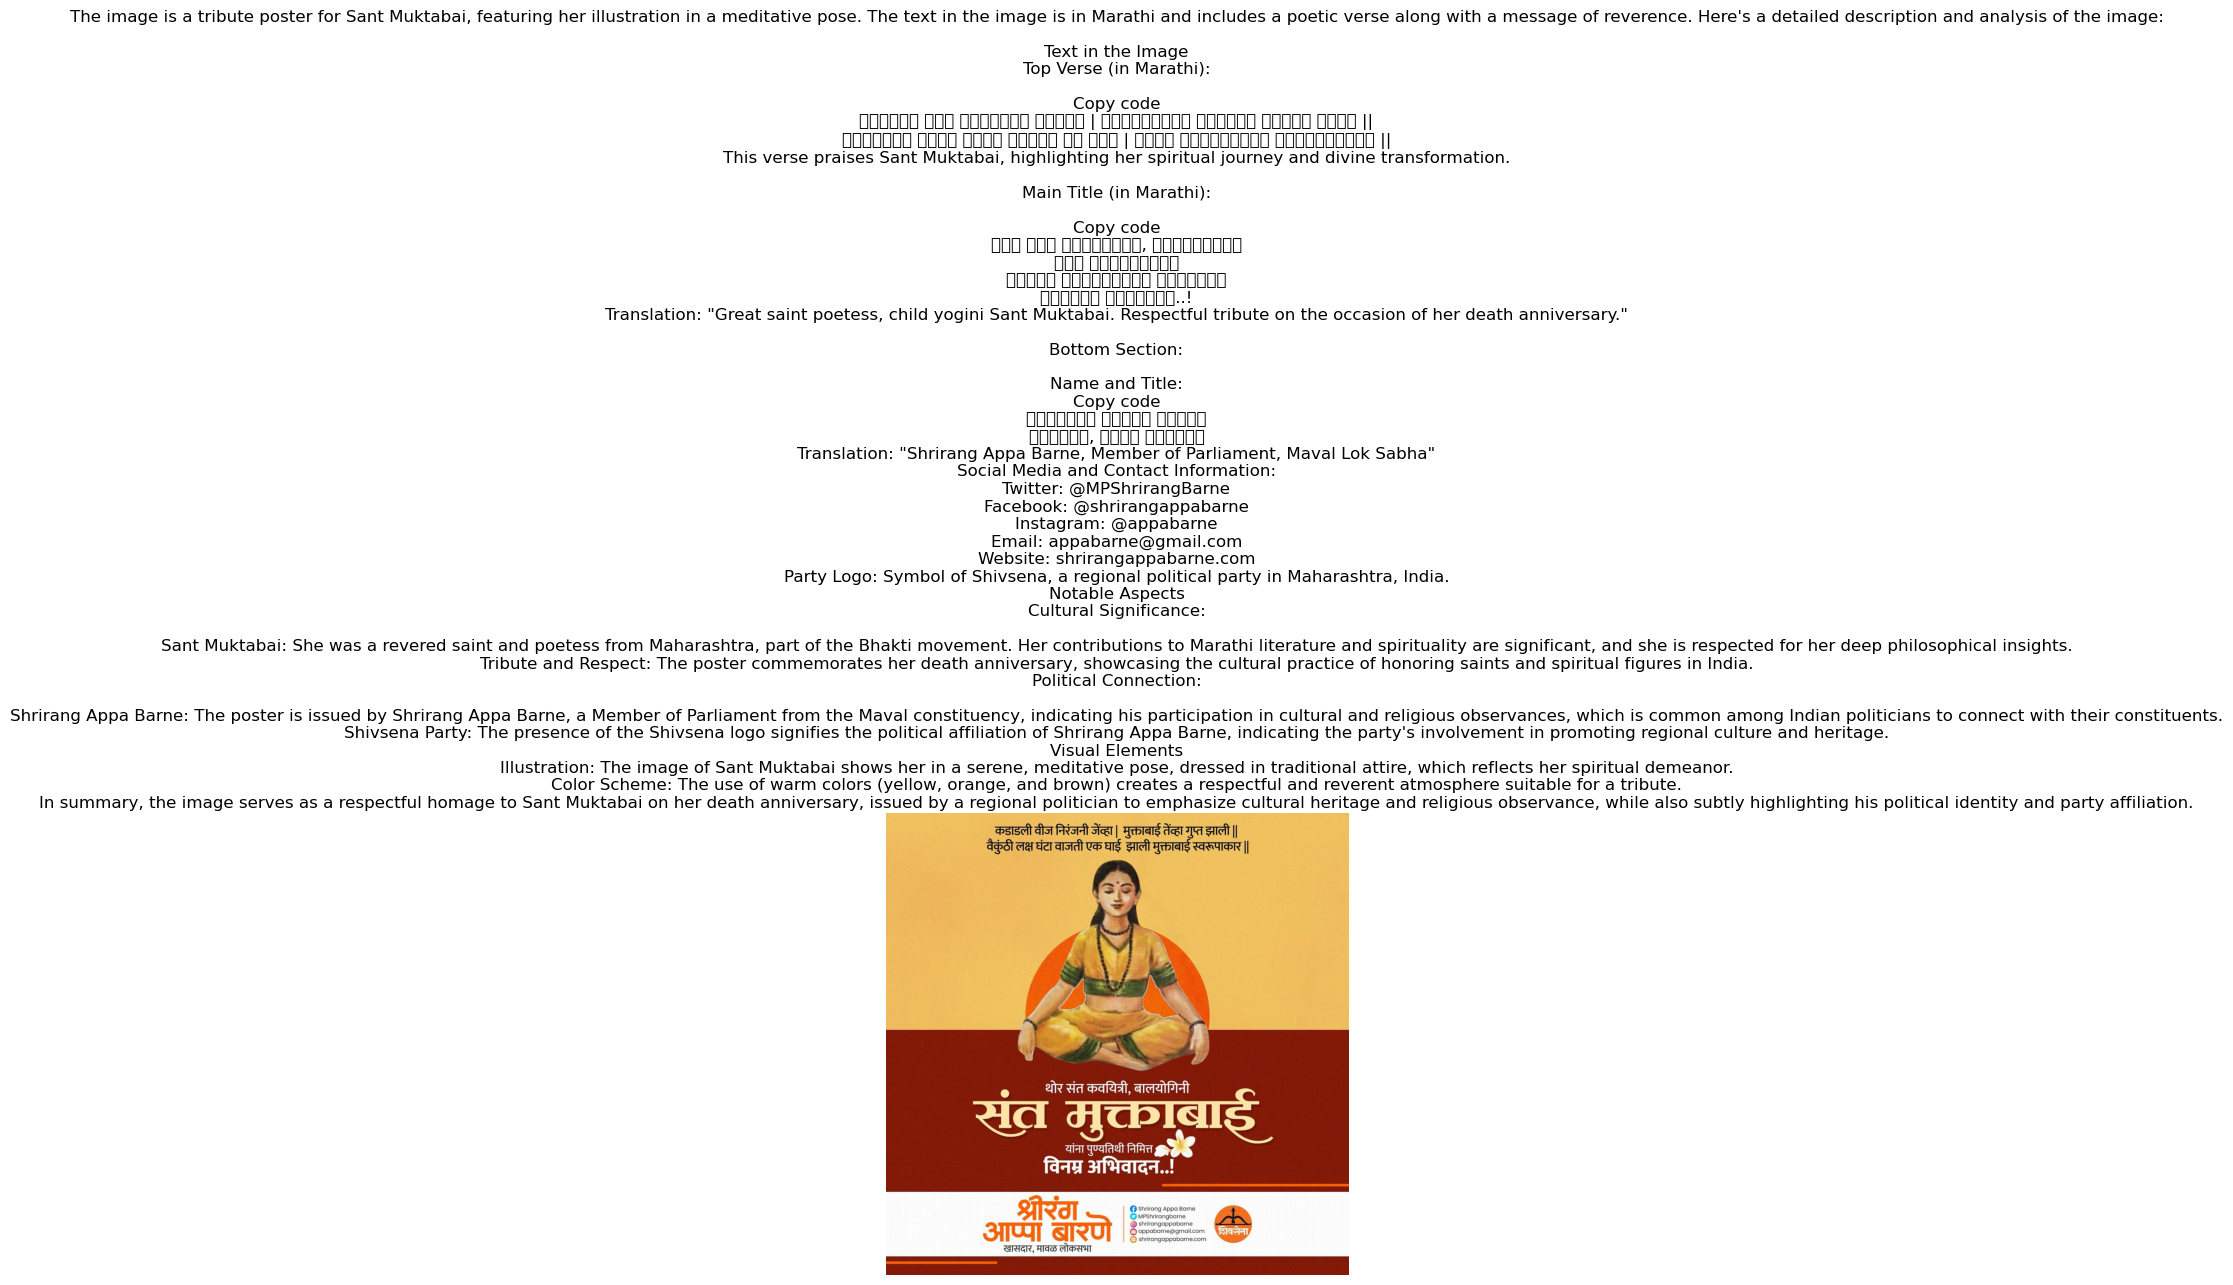

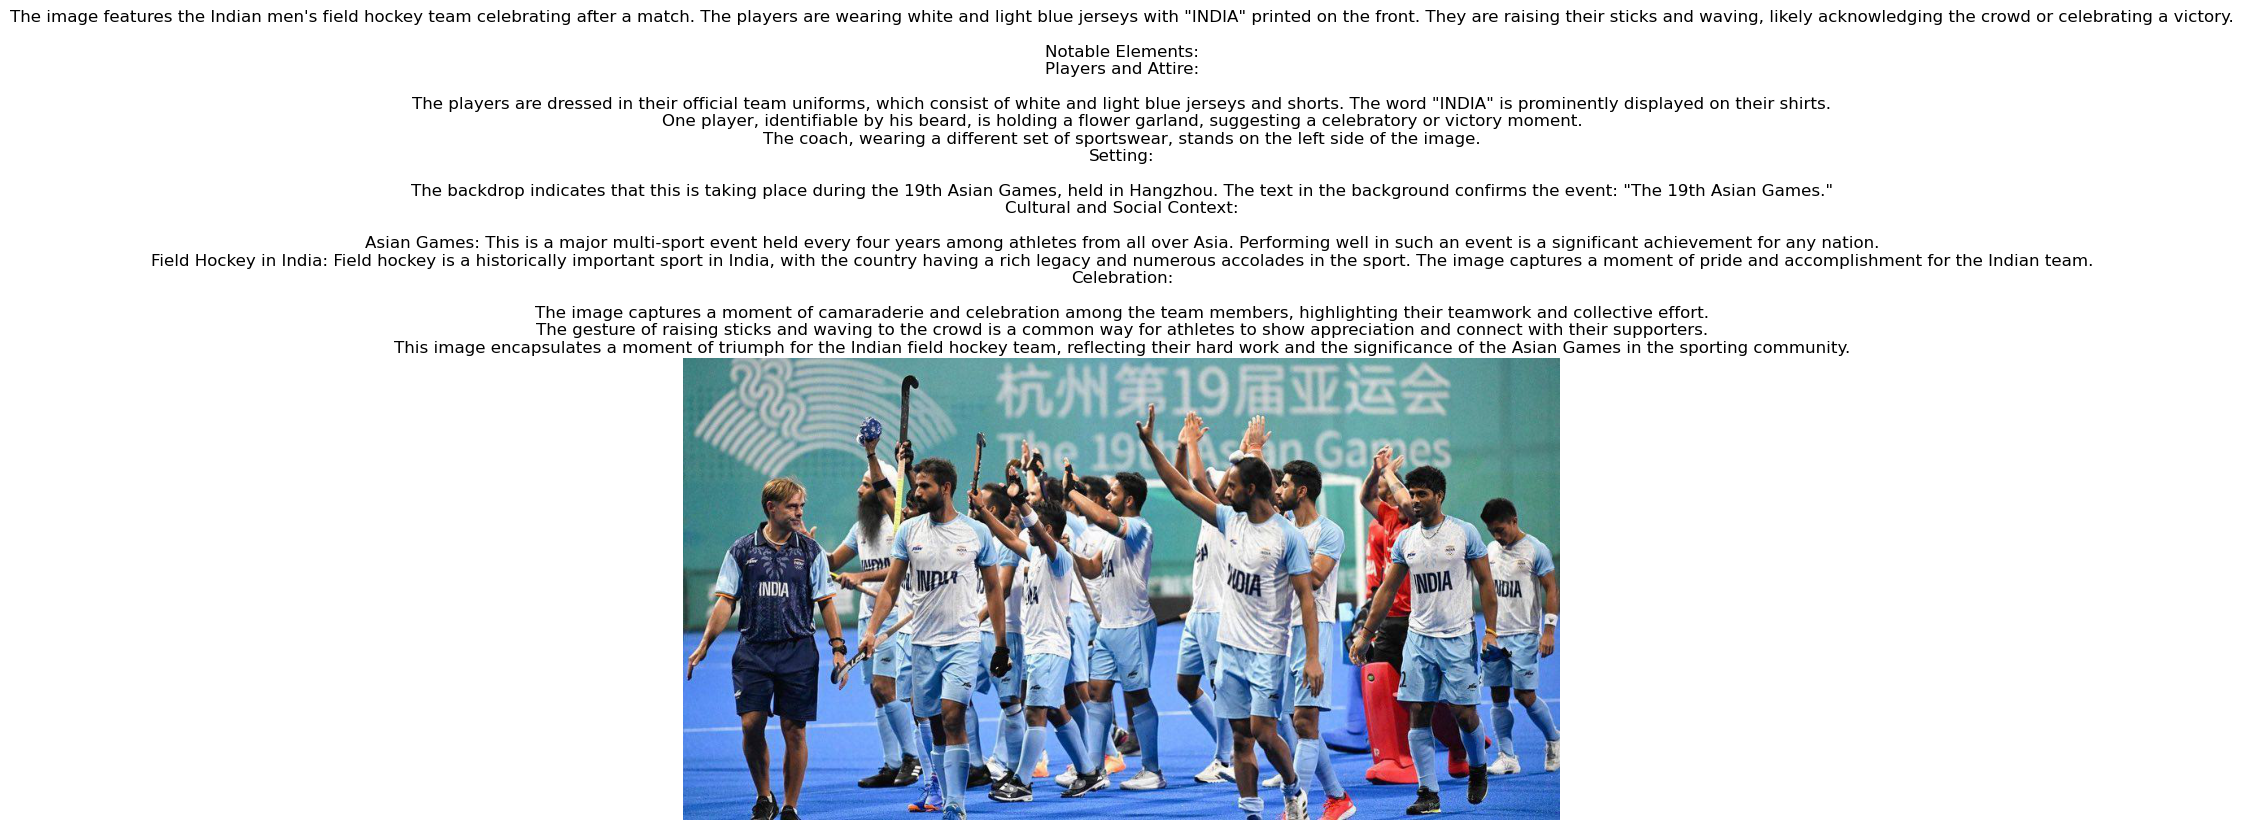

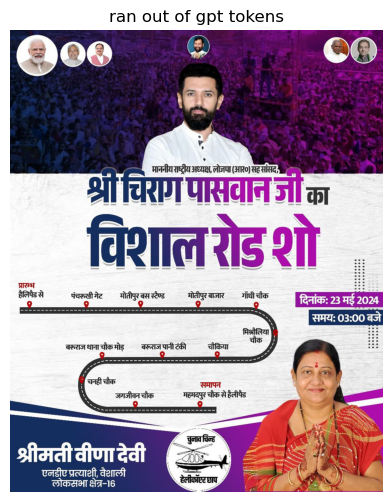

In [38]:
# Plot each image with its corresponding caption
for image_file, caption in zip(image_files, gpt_captions):
    img = mpimg.imread(image_file)
    plt.figure(figsize=(23, 6))
    plt.imshow(img)
    plt.title(caption, wrap=True)  # wrap=True ensures that long text is wrapped
    plt.axis('off')  # Turn off axis
    plt.show()

In [1]:
from lmdeploy import pipeline
from lmdeploy.vl import load_image


d:\Anaconda\Lib\site-packages\transformers\utils\generic.py:481: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [ ]:
pipe = pipeline('OpenGVLab/InternVL-Chat-V1-5')

In [ ]:
image = load_image('examples/image2.jpg')
response = pipe(('describe this image', image))
print(response)